# Using ClickPoints for Visualizing Simulation Results

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import clickpoints

In [2]:
# Simulation parameters
N = 10
size = 100
size = 100
frame_count = 100

In [3]:
# create new database
db = clickpoints.DataFile("sim.cdb", "w")

path sim.cdb


In [4]:
# Create a new marker type
type_point = db.setMarkerType("point", "#FF0000", mode=db.TYPE_Track)

# Create track instances
tracks = [db.setTrack(type_point) for i in range(N)]

In [5]:
# Fix the seed
np.random.seed(0)

# Create initial positions
points = np.random.rand(N, 2)*size

# iterate
for i in range(frame_count):
    # Create a new frame
    image = db.setImage("frame_%03d" % i, width=size, height=size)

    # Move the positions
    points += np.random.rand(N, 2)-0.5

    # Save the new positions
    db.setMarkers(image=image, x=points[:, 0], y=points[:, 1], track=tracks)

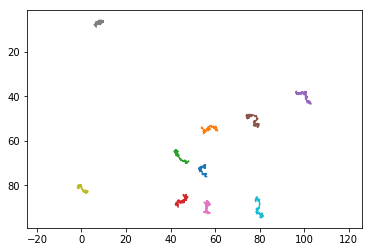

In [6]:
# plot the results
for track in tracks:
    plt.plot(track.points[:, 0], track.points[:, 1], '-')
# adjust the plot ranges
plt.xlim(0, size)
plt.ylim(size, 0)
# and adjust the scaling to equal
plt.axis("equal")
plt.show()

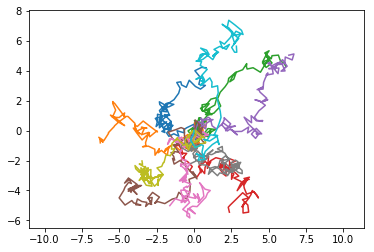

In [7]:
# plot the results
for track in tracks:
    # get the points
    points = track.points
    # substract the inital point
    points = points-points[0, :]
    # plot the track from the new origin
    plt.plot(points[:, 0], points[:, 1], '-')
# and adjust the scaling to equal
plt.axis("equal")
plt.show()